# 2. Seaborn

Seaborn ist eine statistische Plotting Bibliothek um Diagramme darzustellen und harmoniert sehr gut mit den Pandas Dataframe-Objekten.

## Links:
* Website: https://seaborn.pydata.org
* Beispiele: https://seaborn.pydata.org/examples/index.html
* API: https://seaborn.pydata.org/api.html 

## Installation
`conda install seaborn` oder `pip install seaborn`

## Import

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Daten

Seaborn verfügt über eingebaute Datensets, die man nutzen kann, z.B. den "Tips"-Datensatz, der Daten zum Trinkgeld in einem Restaurant beschreibt. Man kann jedoch auch wie gewohnt CVS Dateien laden und das DataFrame übergeben.

In [3]:
tips = sns.load_dataset("tips") 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Distribution Plots
Distribution Plots erlauben die Verteilung von Daten n einem Datensatz zu visualisieren:
* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

### distplot

Das *distplot* zeigt die Verteilung eines univariaten Satzes von Beobachtungen an.

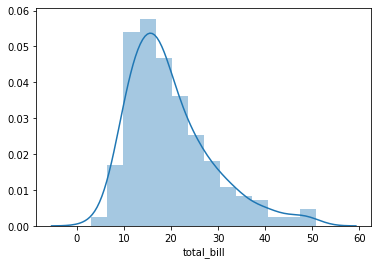

In [4]:
sns.distplot(tips["total_bill"])

Um nur das Histogramm anzuzeigen, muss KDE (Kernel Density Estimation) angepasst werden:

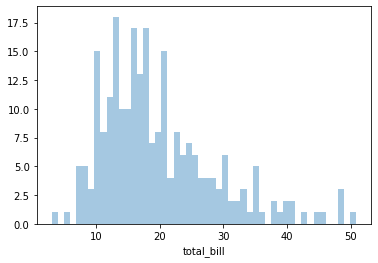

In [6]:
sns.distplot(tips["total_bill"],kde=False,bins=50) # Bins gibt an wieviele Balken angezeigt werden

### jointplot

`jointplot()` ermöglicht es im Grunde genommen zwei *distplots* zu vereinen, um bivariate Daten zu visualisieren. Dabei kann eine Wahl der Art der Darstellung über `kind` getroffen werden:

* scatter
* reg
* resid
* kde
* hex

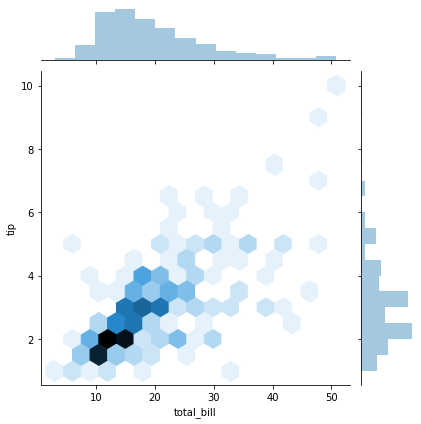

In [11]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")

### pairplot

Das Diagramm *pairplot* zeigt paarweise Beziehungen in einem kompletten Dataframe. Für kategorische Variablen kann über das `hue` Argument die Farbe eingestellt werden.

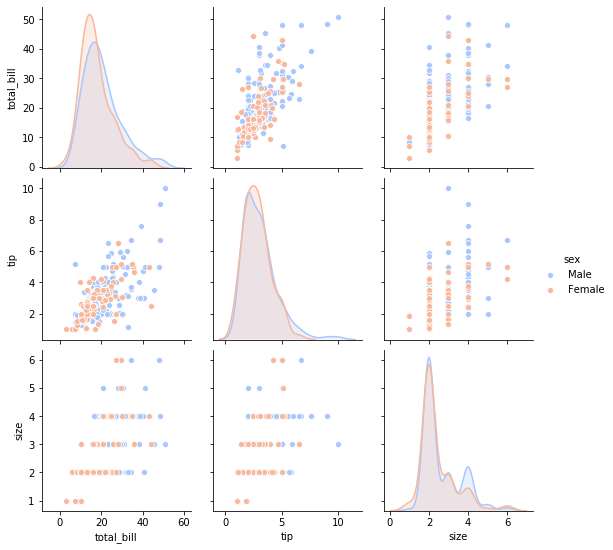

In [13]:
#sns.pairplot(tips)
sns.pairplot(tips,hue='sex',palette='coolwarm')

## Kategorische (Daten) Plots
Diagramme um kategorische Daten zu visualisieren: 
* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

### Barplot

*barplot* ist ein Diagramm, das die kategorischen Daten aggregiert. Per Standard ist dies der Durchschnitt.

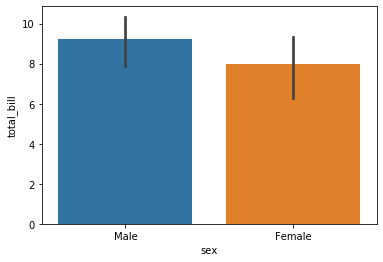

In [15]:
#sns.barplot(x="sex",y="total_bill",data=tips)
sns.barplot(x="sex", y="total_bill", data=tips, estimator=np.std) # Angabe der Standardabweichung

### Countplot
Dieses Diagramm ist prinzipiell das selbe wie das *barplot*. Außer, dass *countplot* die Anzahl an Erscheinungen zählt. Deshalb wird nur ein x Wert übergeben:

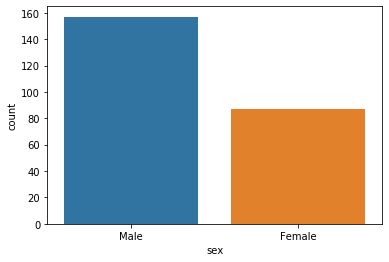

In [16]:
sns.countplot(x="sex",data=tips)

### Boxplot
*boxplots* zeigen die Verteilung von kategorischen Daten. Er zeigt die Verteilung von quantitativen Daten auf eine Art, die den Vergleich zwischen kategorischen Variablen unterstützt. Die *box* zeigt die Quantile des Datensatzes während die *whiskers* den Rest der Verteilung zeigen. Ausgenommen sind Daten, die durch ein Inter-Quanti-Verfahren als Outlier (Ausreißer) eingestuft wurden.

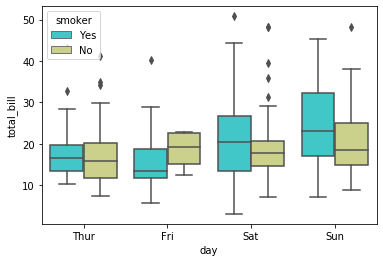

In [21]:
sns.boxplot(x="day",y="total_bill",data=tips,palette="rainbow", hue="smoker")

# Orientierung ändern mit orient="h"
#sns.boxplot(data=tips,palette="coolwarm",orient="h")

### stripplot

Das *stripplot* zeichnet ein Scatterplot, indem eine Variable katagorisch ist. Ein *strip plot* kann alleinstehend gezeichnet werden. Es passt aber auch gut zu einem *box* oder *violin plot*, wenn man neben der Verteilung auch alle einzelnen Datenpunkte visualisieren möchte.

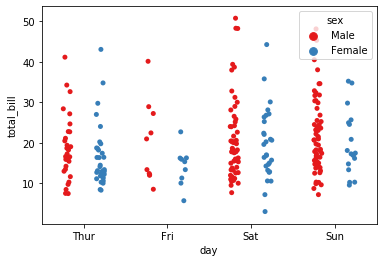

In [25]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex',palette='Set1',dodge=True)

# Weitere Anpassungsmöglichkeiten zu Breite, Farbe und Legende
# sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, hue='sex',palette='Set1', dodge=True)

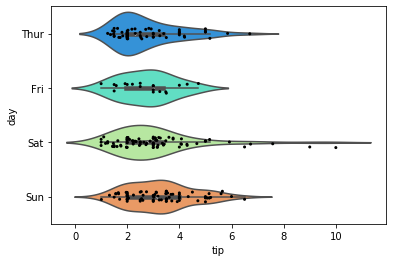

In [28]:
# Kombination zweier Plots
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.stripplot(x="tip", y="day", data=tips,color='black',size=3)

## Matrix Plots

*Matrix* Plots erlaiuben es Daten durch farbkodierte Matrizen zu visualisieren. Dadurch können u.a. Cluster in den Daten aufgezeigt werden.

#### Heatmap

Damit die *Heatmap* gut funktioniert sollten die Daten bereits in Matrixform vorliegen. Die `sns.heatmatp()` übernimmt dann die Einfärbung dieser Daten.

In [29]:
# Matrix der Korrelationsdaten
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


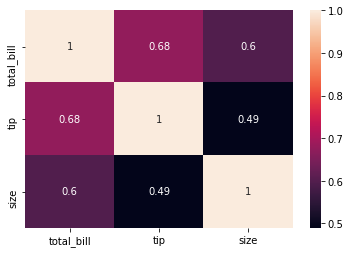

In [33]:
sns.heatmap(tips.corr(), annot=True)
# Farbpalette und Annotationen anpassen:
#sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [37]:
#zweites Beispiel mit Flugdaten:

fluege = sns.load_dataset('flights')
fluege.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [38]:
pvfluege = fluege.pivot_table(values='passengers',index='month',columns='year')
pvfluege

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


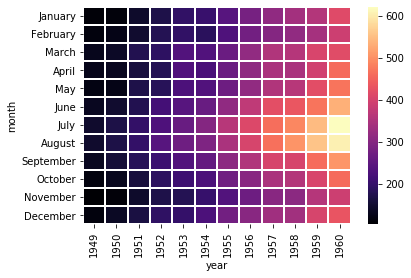

In [41]:
#sns.heatmap(pvfluege)
sns.heatmap(pvfluege,cmap='magma',linecolor='white',linewidths=1)

#### Clustermap

Die *clustermap* nutzt hierarchisches Clustering um eine geclusterte Version der Heatmap zu erstellen.

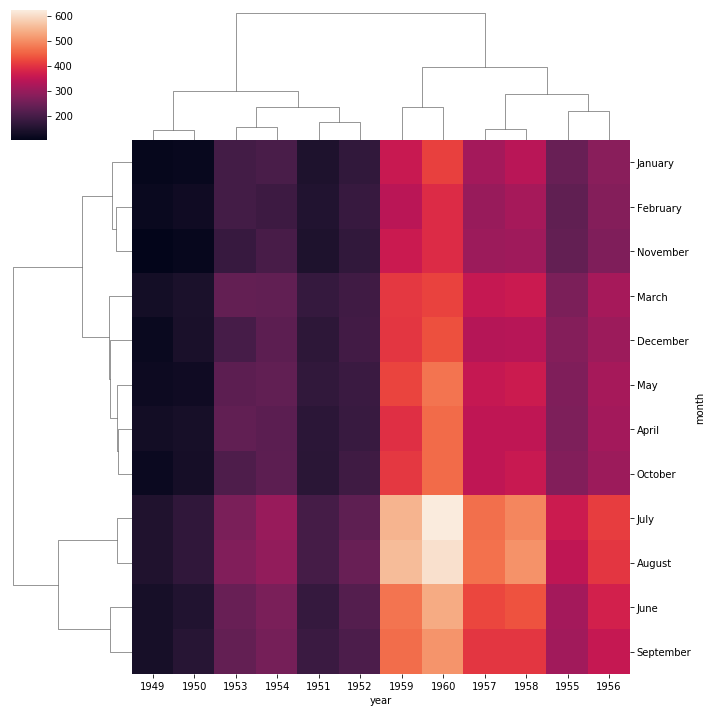

In [42]:
sns.clustermap(pvfluege)

Achtung: Jahre und Monate werden nicht mehr in der korrekten Reihenfolge aufgeführt. Stattdessen sind sie nach Ähnlichkeit (der Passagieranzahl) sortiert. Dadurch lassen sich Ähnlichkeiten besser erkennen, z.B. Juli und August.

**Weiterführende Links zum Styling der Visualisierungen:**
* [Farbpaletten](https://matplotlib.org/examples/color/colormaps_reference.html)
* [Ändern des Styles](http://seaborn.pydata.org/tutorial/aesthetics.html)